In [ ]:
!  git config --global user.email "khayam.gondal@gmail.com"
!  git config --global user.name "Khayam Gondal"
!  git pull

In [5]:
#@title 🤗 AutoTrain DreamBooth
#@markdown In order to use this colab
#@markdown - upload images to a folder named `images/`
#@markdown - choose a project name if you wish
#@markdown - change model if you wish, you can also select sd2/2.1 or sd1.5
#@markdown - update prompt and remember it. choose keywords that don't usually appear in dictionaries
#@markdown - add huggingface information (token and repo_id) if you wish to push trained model to huggingface hub
#@markdown - update hyperparameters if you wish
#@markdown - click `Runtime > Run all` or run each cell individually



!pip install -U autotrain-advanced > install_logs.txt
! pip install xformers git+https://github.com/huggingface/accelerate.git -q
! pip install torch==2.1.0 torchvision==0.14.1+cu117 \
 torchaudio==0.13.1+cu117 \
 --index-url https://download.pytorch.org/whl/cu118 -q! pip install git+https://github.com/huggingface/diffusers -q
! pip install git+https://github.com/huggingface/transformers -q
! pip install protobuf==3.20.*

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.14.1+cu117 requires torch==1.13.1, but you have torch 2.1.0 which is incompatible.
torchtext 0.14.1 requires torch==1.13.1, but you have torch 2.1.0 which is incompatible.
torchdata 0.5.1 requires torch==1.13.1, but you have torch 2.1.0 which is incompatible.
torchaudio 0.13.1+cu117 requires torch==1.13.1, but you have torch 2.1.0 which is incompatible.

Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: -!


In [7]:
!pip freeze | grep torch

torch==2.1.0
torchaudio==0.13.1+cu117
torchdata==0.5.1
torchtext==0.14.1
torchvision==0.14.1+cu117


In [1]:
import os

In [2]:
#@markdown ---
#@markdown #### Project Config
project_name = 'my_dreambooth_project' # @param {type:"string"}
model_name = 'stabilityai/stable-diffusion-xl-base-1.0' # @param ["stabilityai/stable-diffusion-xl-base-1.0", "runwayml/stable-diffusion-v1-5", "stabilityai/stable-diffusion-2-1", "stabilityai/stable-diffusion-2-1-base"]
prompt = 'photo of a woman sitting on desk and working' # @param {type: "string"}

#@markdown ---
#@markdown #### Push to Hub?
#@markdown Use these only if you want to push your trained model to a private repo in your Hugging Face Account
#@markdown If you dont use these, the model will be saved in Google Colab and you are required to download it manually.
#@markdown Please enter your Hugging Face write token. The trained model will be saved to your Hugging Face account.
#@markdown You can find your token here: https://huggingface.co/settings/tokens
push_to_hub = False # @param ["False", "True"] {type:"raw"}
hf_token = "hf_XXX" #@param {type:"string"}
repo_id = "username/repo_name" #@param {type:"string"}

#@markdown ---
#@markdown #### Hyperparameters
learning_rate = 1e-4 # @param {type:"number"}
num_steps = 500 #@param {type:"number"}
batch_size = 1 # @param {type:"slider", min:1, max:32, step:1}
gradient_accumulation = 4 # @param {type:"slider", min:1, max:32, step:1}
resolution = 1024 # @param {type:"slider", min:128, max:1024, step:128}
use_8bit_adam = True # @param ["False", "True"] {type:"raw"}
use_xformers = True # @param ["False", "True"] {type:"raw"}
use_fp16 = True # @param ["False", "True"] {type:"raw"}
train_text_encoder = False # @param ["False", "True"] {type:"raw"}
gradient_checkpointing = True # @param ["False", "True"] {type:"raw"}

os.environ["PROJECT_NAME"] = project_name
os.environ["MODEL_NAME"] = model_name
os.environ["PROMPT"] = prompt
os.environ["PUSH_TO_HUB"] = str(push_to_hub)
os.environ["HF_TOKEN"] = hf_token
os.environ["REPO_ID"] = repo_id
os.environ["LEARNING_RATE"] = str(learning_rate)
os.environ["NUM_STEPS"] = str(num_steps)
os.environ["BATCH_SIZE"] = str(batch_size)
os.environ["GRADIENT_ACCUMULATION"] = str(gradient_accumulation)
os.environ["RESOLUTION"] = str(resolution)
os.environ["USE_8BIT_ADAM"] = str(use_8bit_adam)
os.environ["USE_XFORMERS"] = str(use_xformers)
os.environ["USE_FP16"] = str(use_fp16)
os.environ["TRAIN_TEXT_ENCODER"] = str(train_text_encoder)
os.environ["GRADIENT_CHECKPOINTING"] = str(gradient_checkpointing)

In [8]:
!autotrain dreambooth \
--model ${MODEL_NAME} \
--project-name ${PROJECT_NAME} \
--image-path /datasets/man/ \
--prompt "${PROMPT}" \
--resolution ${RESOLUTION} \
--batch-size ${BATCH_SIZE} \
--num-steps ${NUM_STEPS} \
--gradient-accumulation ${GRADIENT_ACCUMULATION} \
--lr ${LEARNING_RATE} \
$( [[ "$USE_FP16" == "True" ]] && echo "--fp16" ) \
$( [[ "$USE_XFORMERS" == "True" ]] && echo "--xformers" ) \
$( [[ "$TRAIN_TEXT_ENCODER" == "True" ]] && echo "--train-text-encoder" ) \
$( [[ "$USE_8BIT_ADAM" == "True" ]] && echo "--use-8bit-adam" ) \
$( [[ "$GRADIENT_CHECKPOINTING" == "True" ]] && echo "--gradient-checkpointing" ) \
$( [[ "$PUSH_TO_HUB" == "True" ]] && echo "--push-to-hub --token ${HF_TOKEN} --repo-id ${REPO_ID}" )

/usr/local/lib/python3.9/dist-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")
> INFO    Namespace(version=False, model='stabilityai/stable-diffusion-xl-base-1.0', revision=None, tokenizer=None, image_path='/datasets/man/', class_image_path=None, prompt='photo of a woman sitting on desk and working', class_prompt=None, num_class_images=100, class_labels_conditioning=None, prior_preservation=None, prior_loss_weight=1.0, project_name='my_dreambooth_project', seed=42, resolution=1024, center_crop=None, train_text_encoder=None, batch_size=1, sample_batch_size=4, epochs=1, num_steps=500, checkpointing_steps=100000, resume_from_checkpoint=None, gradient_accumulation=4, gradient_checkpointing=True, lr=0.0001, scale_lr=None, scheduler='constant', warmup_steps=0, num_cycles=1, lr_power=1.0, dataloader_num_workers=0, use_8bit

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

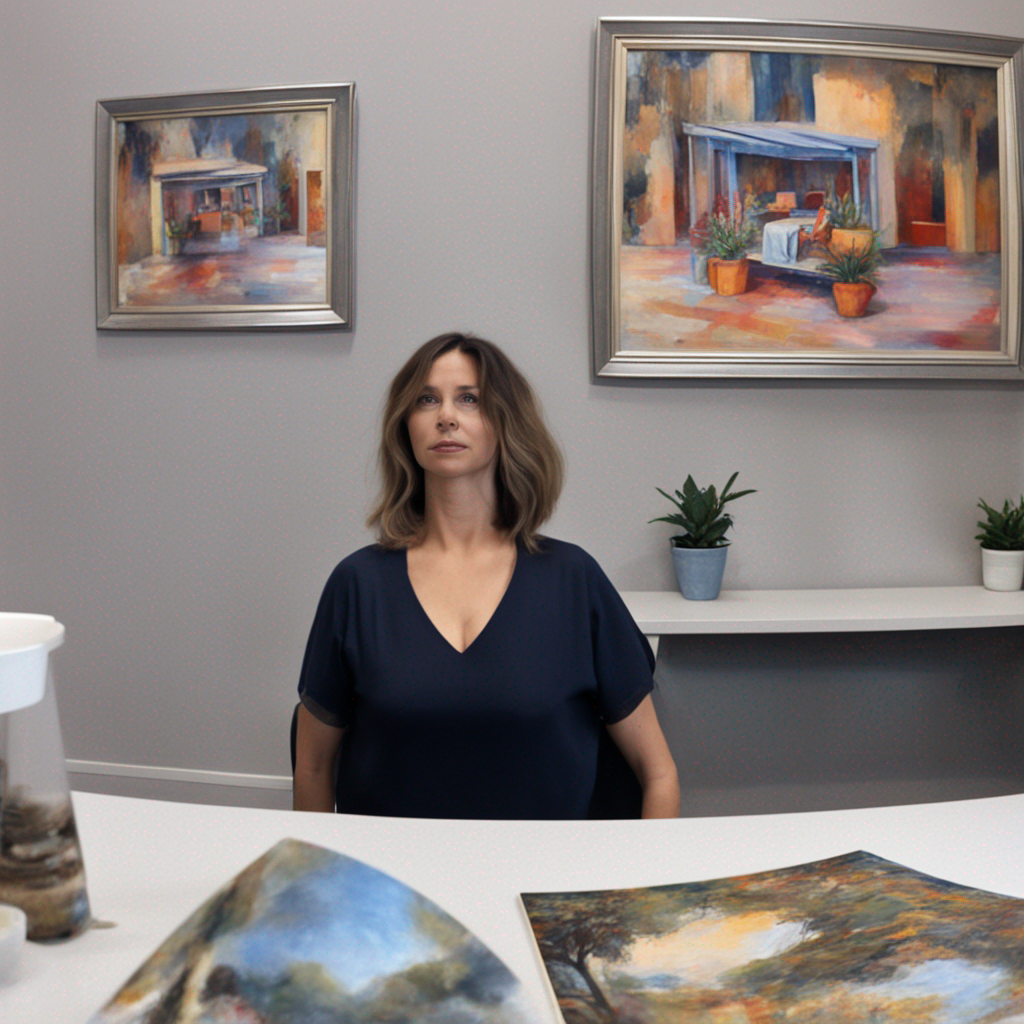

In [ ]:
# Inference
# this is the inference code that you can use after you have trained your model
# Unhide code below and change prj_path to your repo or local path (e.g. my_dreambooth_project)
#
#
#
from diffusers import DiffusionPipeline, StableDiffusionXLImg2ImgPipeline
import torch

prj_path = "my_dreambooth_project"
model = "stabilityai/stable-diffusion-xl-base-1.0"
pipe = DiffusionPipeline.from_pretrained(
     model,
     torch_dtype=torch.float16,
 )
pipe.to("cuda")
pipe.load_lora_weights(prj_path, weight_name="pytorch_lora_weights.safetensors")

refiner = StableDiffusionXLImg2ImgPipeline.from_pretrained(
     "stabilityai/stable-diffusion-xl-refiner-1.0",
     torch_dtype=torch.float16,
)
refiner.to("cuda")



In [ ]:
prompt = "with lisa ann face"

seed = 42
generator = torch.Generator("cuda").manual_seed(seed)
image = pipe(prompt=prompt, generator=generator).images[0]
image = refiner(prompt=prompt, generator=generator, image=image).images[0]
image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 11.5 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.23.4
    Uninstalling protobuf-4.23.4:
      Successfully uninstalled protobuf-4.23.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
tensorflow 2.9.2 requires tensorboard<2.10,>=2.9, but you have tensorboard 2.14.1 which is incompatible.
autotrain-advanced 0.6.36 requires protobuf==4.23.4, but you have protobuf 3.20.3 which is incompatible.


In [ ]:
! git commit -a -m "updated notebook via paperspace"
! git push
! git status